In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons,make_circles,make_classification

## Neural Network

In [12]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [155]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

In [202]:
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        model.backward(X,Y_OHT)
        if(logs and ix%100==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    
    #model.summary()


In [203]:
def plot_graph(X,Y):
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
    plt.show()

In [204]:
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## OR Function

(4, 2)
(4,)


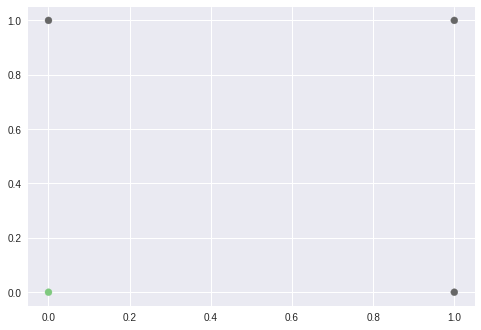

In [205]:
dataset = 'or'

def load_dataset(dataset):
    X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
    Y = np.array([0,1,1,1])
        
    return X,Y

X,Y = load_dataset(dataset)
print(X.shape)
print(Y.shape)
plot_graph(X,Y)

In [206]:
input_size = 2
layers = [4,3]
output_size = 2
model = NeuralNetwork(input_size=input_size,layers=layers,output_size=output_size)
train(X,Y,model,epochs=1000)

Epoch 0 Loss 1.5705
Epoch 100 Loss 0.2795
Epoch 200 Loss 0.1363
Epoch 300 Loss 0.0776
Epoch 400 Loss 0.0490
Epoch 500 Loss 0.0341
Epoch 600 Loss 0.0256
Epoch 700 Loss 0.0203
Epoch 800 Loss 0.0168
Epoch 900 Loss 0.0143


In [207]:
model.summary()

W1  (2, 4)
A1  (4, 4)
W2  (4, 3)
A2  (4, 3)
W3  (3, 2)
Y_  (4, 2)


In [208]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 100.0000


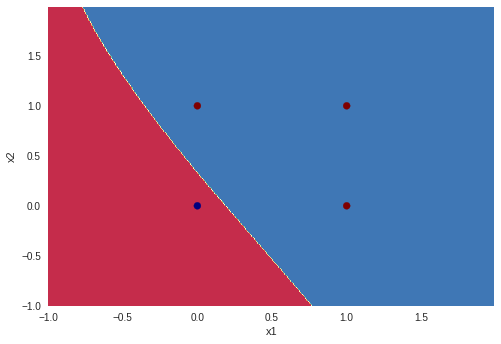

In [209]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

## AND function

(4, 2)
(4,)


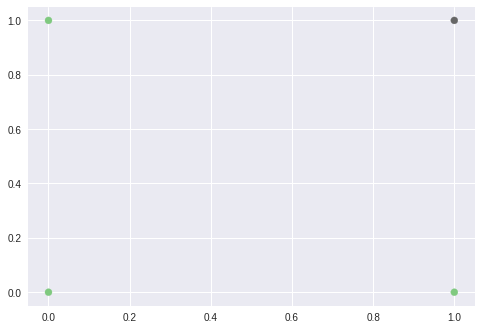

In [210]:
dataset = 'and'

def load_dataset(dataset):
    X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
    Y = np.array([0,0,0,1])
        
    return X,Y

X,Y = load_dataset(dataset)
print(X.shape)
print(Y.shape)
plot_graph(X,Y)

In [211]:
input_size = 2
layers = [4,3]
output_size = 2
model = NeuralNetwork(input_size=input_size,layers=layers,output_size=output_size)
train(X,Y,model,epochs=1000)

Epoch 0 Loss 0.7328
Epoch 100 Loss 0.2901
Epoch 200 Loss 0.2040
Epoch 300 Loss 0.1660
Epoch 400 Loss 0.1363
Epoch 500 Loss 0.1113
Epoch 600 Loss 0.0912
Epoch 700 Loss 0.0755
Epoch 800 Loss 0.0634
Epoch 900 Loss 0.0541


In [212]:
model.summary()

W1  (2, 4)
A1  (4, 4)
W2  (4, 3)
A2  (4, 3)
W3  (3, 2)
Y_  (4, 2)


In [213]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 100.0000


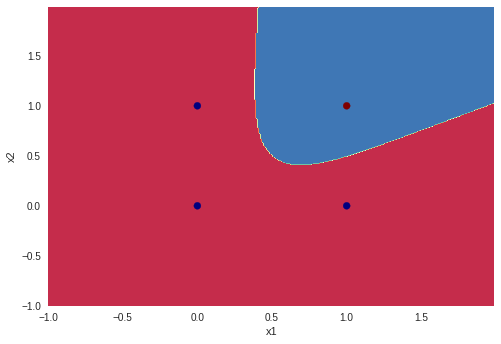

In [214]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

# Activation Function Graph

In [254]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
    return max(0 ,x)

In [255]:
y_sig = [sigmoid(x) for x in range(-10 , 10) ]
X = [x for x in range(-10 ,10)]
y_tanh = [tanh(x) for x in range(-10 , 10) ]
y_relu = [relu(x) for x in range(-10 , 10) ]


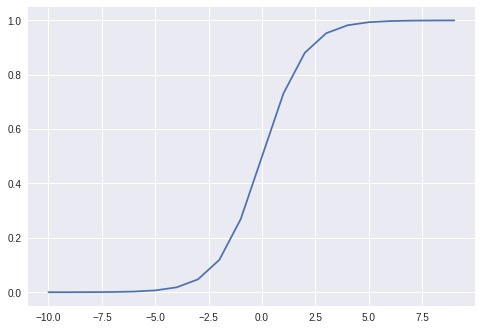

In [262]:
plt.plot(X ,y_sig)
plt.show()

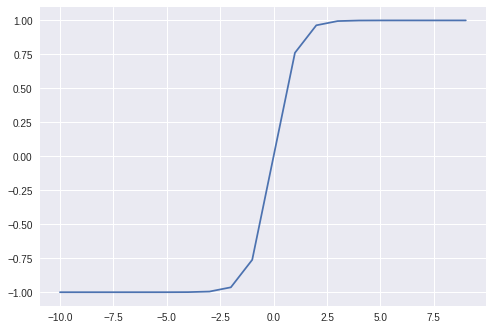

In [264]:
plt.plot(X ,y_tanh)
plt.show()

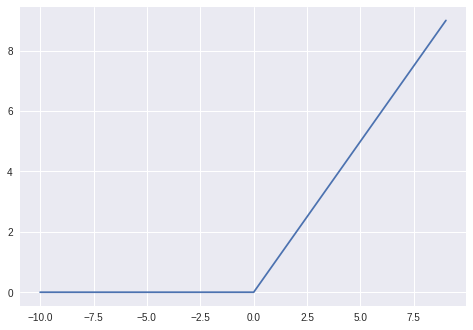

In [265]:
plt.plot(X ,y_relu)
plt.show()

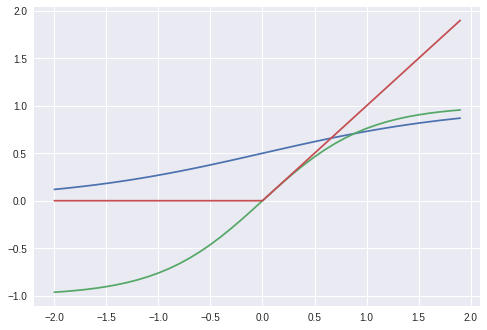

In [281]:
l = 20
y_sig = [sigmoid(x/10) for x in range(-l , l) ]
X = [x/10 for x in range(-l ,l)]
y_tanh = [tanh(x/10) for x in range(-l , l) ]
y_relu = [relu(x/10) for x in range(-l , l) ]

plt.plot(X ,y_sig)
plt.plot(X ,y_tanh)
plt.plot(X ,y_relu)
plt.show()